<a href="https://colab.research.google.com/github/AshTheFallen/Image-Segmentation-Tutorial/blob/main/Image_Segmentation_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage

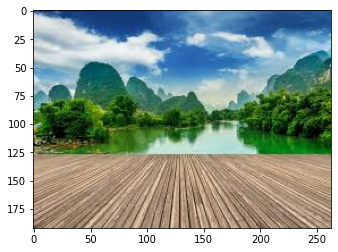

In [ ]:
image = plt.imread('1.jpeg')
image.shape
plt.imshow(image)

(192, 263)

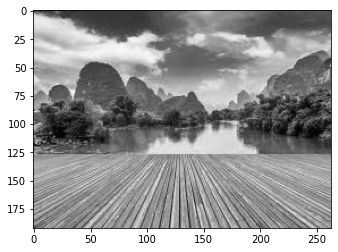

In [ ]:
gray = rgb2gray(image)
plt.imshow(gray,cmap='gray')
gray.shape

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 1 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 0 1 1]]


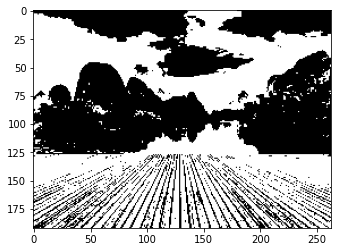

In [ ]:
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
gray_r = np.array([1 if i > gray.mean() else 0 for i in gray_r])
gray_r = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray_r,cmap='gray')
print(gray_r)

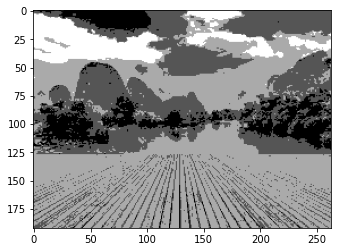

In [ ]:
gray = rgb2gray(image)
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 3
    elif gray_r[i] > 0.5:
        gray_r[i] = 2
    elif gray_r[i] > 0.25:
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')

(192, 263, 3)


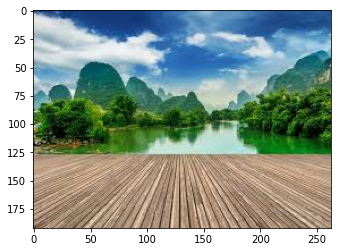

In [ ]:
pic = plt.imread('1.jpeg')/255  # dividing by 255 to bring the pixel values between 0 and 1
print(pic.shape)
plt.imshow(pic)

In [ ]:
pic_n = pic.reshape(pic.shape[0]*pic.shape[1], pic.shape[2])
pic_n.shape

(50496, 3)

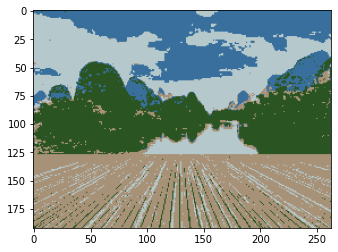

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4, random_state=0).fit(pic_n)
pic2show = kmeans.cluster_centers_[kmeans.labels_] # array indexing 
cluster_pic = pic2show.reshape(pic.shape[0], pic.shape[1], pic.shape[2])
plt.imshow(cluster_pic)